In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
vendas = pd.read_csv('vendas.csv', delimiter=';')
print('Tamanho da base de dados: ' + str(len(vendas)) + ' observações\n')
print(vendas.dtypes)
vendas

Tamanho da base de dados: 484 observações

data                   object
codigo_loja             int64
codigo_produto          int64
ean_produto             int64
preco_sistema         float64
quantidade_vendas     float64
quantidade_estoque    float64
dtype: object


,data,codigo_loja,codigo_produto,ean_produto,preco_sistema,quantidade_vendas,quantidade_estoque
0,2021-11-02,1,675711,7891025120223,2.90,14.0,46.0
1,2021-11-01,1,675711,7891025120223,2.90,15.0,60.0
2,2021-10-31,1,675711,7891025120223,NaN,0.0,35.0
3,2021-10-30,1,675711,7891025120223,2.90,17.0,35.0
4,2021-10-29,1,675711,7891025120223,2.90,3.0,52.0
...,...,...,...,...,...,...,...
479,2021-07-09,5,675711,7891025120223,1.79,13.0,36.0
480,2021-07-08,5,675711,7891025120223,1.79,13.0,49.0
481,2021-07-07,5,675711,7891025120223,1.79,1.0,62.0
482,2021-07-06,5,675711,7891025120223,1.79,14.0,63.0


In [3]:
# Convertendo a variável data para formato de data
vendas['data'] = pd.to_datetime(vendas['data'])
print(vendas.dtypes)
vendas.head()

data                  datetime64[ns]
codigo_loja                    int64
codigo_produto                 int64
ean_produto                    int64
preco_sistema                float64
quantidade_vendas            float64
quantidade_estoque           float64
dtype: object


,data,codigo_loja,codigo_produto,ean_produto,preco_sistema,quantidade_vendas,quantidade_estoque
0,2021-11-02,1,675711,7891025120223,2.9,14.0,46.0
1,2021-11-01,1,675711,7891025120223,2.9,15.0,60.0
2,2021-10-31,1,675711,7891025120223,NaN,0.0,35.0
3,2021-10-30,1,675711,7891025120223,2.9,17.0,35.0
4,2021-10-29,1,675711,7891025120223,2.9,3.0,52.0


In [4]:
# Incluindo a variável 'estoque_inicial', que contém a quantidade do produto em estoque no início do dia.
# E alterando o nome da coluna
vendas['estoque_inicial'] = vendas['quantidade_vendas'] + vendas['quantidade_estoque']
vendas = vendas.rename(columns = {'quantidade_estoque': 'estoque_final'}, inplace=False)
vendas

,data,codigo_loja,codigo_produto,ean_produto,preco_sistema,quantidade_vendas,estoque_final,estoque_inicial
0,2021-11-02,1,675711,7891025120223,2.90,14.0,46.0,60.0
1,2021-11-01,1,675711,7891025120223,2.90,15.0,60.0,75.0
2,2021-10-31,1,675711,7891025120223,NaN,0.0,35.0,35.0
3,2021-10-30,1,675711,7891025120223,2.90,17.0,35.0,52.0
4,2021-10-29,1,675711,7891025120223,2.90,3.0,52.0,55.0
...,...,...,...,...,...,...,...,...
479,2021-07-09,5,675711,7891025120223,1.79,13.0,36.0,49.0
480,2021-07-08,5,675711,7891025120223,1.79,13.0,49.0,62.0
481,2021-07-07,5,675711,7891025120223,1.79,1.0,62.0,63.0
482,2021-07-06,5,675711,7891025120223,1.79,14.0,63.0,77.0


In [5]:
# Visualização das estatísticas das variáveis métricas
vendas[['preco_sistema', 'quantidade_vendas', 'estoque_inicial', 'estoque_final']].describe()

,preco_sistema,quantidade_vendas,estoque_inicial,estoque_final
count,166.000000,484.000000,484.000000,484.000000
mean,2.681446,2.915289,18.778926,15.863636
std,0.364913,6.251050,27.569875,24.003752
min,1.790000,0.000000,0.000000,0.000000
25%,2.290000,0.000000,0.000000,0.000000
50%,2.900000,0.000000,7.000000,1.500000
75%,2.900000,3.000000,30.000000,26.000000
max,2.900000,45.000000,201.000000,178.000000


In [6]:
# Verificando a correlação entre as variáveis métricas

corr = vendas.drop(['codigo_loja', 'codigo_produto', 'ean_produto'], axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,preco_sistema,quantidade_vendas,estoque_final,estoque_inicial
preco_sistema,1.000000,-0.311614,-0.247119,-0.296980
quantidade_vendas,-0.311614,1.000000,0.482651,0.646956
estoque_final,-0.247119,0.482651,1.000000,0.980085
estoque_inicial,-0.296980,0.646956,0.980085,1.000000


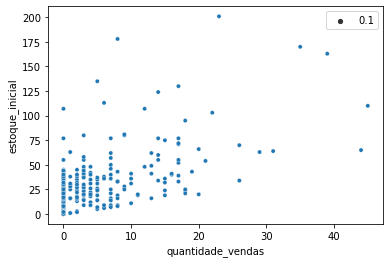

In [7]:
# Visualizando a correlação entre vendas e estoque no início do dia
ax = sns.scatterplot(x=vendas['quantidade_vendas'],y=vendas['estoque_inicial'], size=0.1)

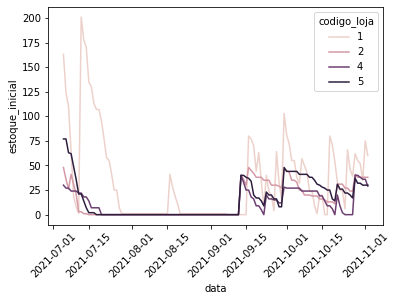

In [8]:
# Visualização da quantidade do produto em estoque
ax = sns.lineplot(x=vendas['data'], y=vendas['estoque_inicial'], hue=vendas['codigo_loja'])
ax.tick_params(axis='x', rotation=45)

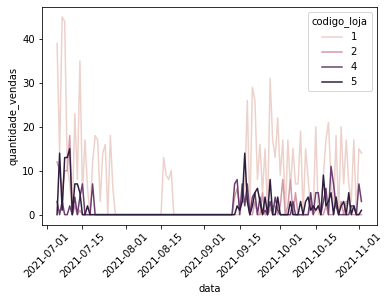

In [9]:
# Visualização da quantidade de vendas
ax = sns.lineplot(x=vendas['data'], y=vendas['quantidade_vendas'], hue=vendas['codigo_loja'])
ax.tick_params(axis='x', rotation=45)

In [10]:
vendas[vendas['quantidade_vendas'] == 0].describe()

# Em todos os dias onde não houve vendas, não havia um preço definido para o produto

,codigo_loja,codigo_produto,ean_produto,preco_sistema,quantidade_vendas,estoque_final,estoque_inicial
count,318.000000,318.0,3.180000e+02,0.0,318.0,318.000000,318.000000
mean,3.150943,675711.0,7.891025e+12,NaN,0.0,7.716981,7.716981
std,1.518295,0.0,0.000000e+00,NaN,0.0,14.568724,14.568724
min,1.000000,675711.0,7.891025e+12,NaN,0.0,0.000000,0.000000
25%,2.000000,675711.0,7.891025e+12,NaN,0.0,0.000000,0.000000
50%,4.000000,675711.0,7.891025e+12,NaN,0.0,0.000000,0.000000
75%,5.000000,675711.0,7.891025e+12,NaN,0.0,8.750000,8.750000
max,5.000000,675711.0,7.891025e+12,NaN,0.0,107.000000,107.000000


In [11]:
# Geração de uma base de dados agrupada por loja e ordenada pela data
vendas = vendas.sort_values(by=['data']).groupby(['codigo_loja', 'data']).sum()
vendas.head(20)

codigo_produto    ean_produto  preco_sistema  \
codigo_loja data                                                       
1           2021-07-05          675711  7891025120223           1.79   
            2021-07-06          675711  7891025120223           1.79   
            2021-07-07          675711  7891025120223           1.79   
            2021-07-08          675711  7891025120223           1.79   
            2021-07-09          675711  7891025120223           1.79   
            2021-07-10          675711  7891025120223           1.79   
            2021-07-11          675711  7891025120223           0.00   
            2021-07-12          675711  7891025120223           2.29   
            2021-07-13          675711  7891025120223           2.29   
            2021-07-14          675711  7891025120223           2.29   
            2021-07-15          675711  7891025120223           2.29   
            2021-07-16          675711  7891025120223           2.29   
            2021-07-17          675711  7891025120223           2.29   
            2021-07-18          675711  7891025120223           0.00   
            2021-07-19          675711  7891025120223           2.29   
            2021-07-20          675711  7891025120223           2.29   
            2021-07-21          675711  7891025120223           2.29   
            2021-07-22          675711  7891025120223           2.29   
            2021-07-23          675711  7891025120223           2.29   
            2021-07-24          675711  7891025120223           2.29   

                        quantidade_vendas  estoque_final  estoque_inicial  
codigo_loja data                                                           
1           2021-07-05               39.0          124.0            163.0  
            2021-07-06               14.0          110.0            124.0  
            2021-07-07               45.0           65.0            110.0  
            2021-07-08               44.0           21.0             65.0  
            2021-07-09               11.0            8.0             19.0  
            2021-07-10                7.0            1.0              8.0  
            2021-07-11                0.0            1.0              1.0  
            2021-07-12               23.0          178.0            201.0  
            2021-07-13                8.0          170.0            178.0  
            2021-07-14               35.0          135.0            170.0  
            2021-07-15                5.0          130.0            135.0  
            2021-07-16               17.0          113.0            130.0  
            2021-07-17                6.0          107.0            113.0  
            2021-07-18                0.0          107.0            107.0  
            2021-07-19               12.0           95.0            107.0  
            2021-07-20               18.0           77.0             95.0  
            2021-07-21               17.0           60.0             77.0  
            2021-07-22                3.0           55.0             58.0  
            2021-07-23               14.0           41.0             55.0  
            2021-07-24               16.0           25.0             41.0

In [12]:
# Adição da variável 'quantidade_adicionada', que indica a quantidade do produto que chegou na loja no dia

vendas['quantidade_adicionada'] = vendas['estoque_inicial'].diff() - vendas['quantidade_vendas'].diff() + vendas['quantidade_vendas']
vendas.head(20)

codigo_produto    ean_produto  preco_sistema  \
codigo_loja data                                                       
1           2021-07-05          675711  7891025120223           1.79   
            2021-07-06          675711  7891025120223           1.79   
            2021-07-07          675711  7891025120223           1.79   
            2021-07-08          675711  7891025120223           1.79   
            2021-07-09          675711  7891025120223           1.79   
            2021-07-10          675711  7891025120223           1.79   
            2021-07-11          675711  7891025120223           0.00   
            2021-07-12          675711  7891025120223           2.29   
            2021-07-13          675711  7891025120223           2.29   
            2021-07-14          675711  7891025120223           2.29   
            2021-07-15          675711  7891025120223           2.29   
            2021-07-16          675711  7891025120223           2.29   
            2021-07-17          675711  7891025120223           2.29   
            2021-07-18          675711  7891025120223           0.00   
            2021-07-19          675711  7891025120223           2.29   
            2021-07-20          675711  7891025120223           2.29   
            2021-07-21          675711  7891025120223           2.29   
            2021-07-22          675711  7891025120223           2.29   
            2021-07-23          675711  7891025120223           2.29   
            2021-07-24          675711  7891025120223           2.29   

                        quantidade_vendas  estoque_final  estoque_inicial  \
codigo_loja data                                                            
1           2021-07-05               39.0          124.0            163.0   
            2021-07-06               14.0          110.0            124.0   
            2021-07-07               45.0           65.0            110.0   
            2021-07-08               44.0           21.0             65.0   
            2021-07-09               11.0            8.0             19.0   
            2021-07-10                7.0            1.0              8.0   
            2021-07-11                0.0            1.0              1.0   
            2021-07-12               23.0          178.0            201.0   
            2021-07-13                8.0          170.0            178.0   
            2021-07-14               35.0          135.0            170.0   
            2021-07-15                5.0          130.0            135.0   
            2021-07-16               17.0          113.0            130.0   
            2021-07-17                6.0          107.0            113.0   
            2021-07-18                0.0          107.0            107.0   
            2021-07-19               12.0           95.0            107.0   
            2021-07-20               18.0           77.0             95.0   
            2021-07-21               17.0           60.0             77.0   
            2021-07-22                3.0           55.0             58.0   
            2021-07-23               14.0           41.0             55.0   
            2021-07-24               16.0           25.0             41.0   

                        quantidade_adicionada  
codigo_loja data                               
1           2021-07-05                    NaN  
            2021-07-06                    0.0  
            2021-07-07                    0.0  
            2021-07-08                    0.0  
            2021-07-09                   -2.0  
            2021-07-10                    0.0  
            2021-07-11                    0.0  
            2021-07-12                  200.0  
            2021-07-13                    0.0  
            2021-07-14                    0.0  
            2021-07-15                    0.0  
            2021-07-16                    0.0  
            2021-07-17                    0.0  
            2021-07-18  

In [13]:
# Para o primeiro dia do histórico, não sabemos a data de chegada do lote com os danones, então consideraremos
# A aplicação será mais confiável a partir do segundo lote de danones que chega à loja

vendas = vendas.reset_index()
for i in vendas[vendas['data'] == '2021-07-05'].index:
    #vendas[vendas['data'] == '2021-07-05']['estoque_inicial']
    vendas.iloc[i,8] = vendas.iloc[i,7]
vendas[vendas['data'] == '2021-07-05']

,codigo_loja,data,codigo_produto,ean_produto,preco_sistema,quantidade_vendas,estoque_final,estoque_inicial,quantidade_adicionada
0,1,2021-07-05,675711,7891025120223,1.79,39.0,124.0,163.0,163.0
121,2,2021-07-05,675711,7891025120223,2.29,12.0,36.0,48.0,48.0
242,4,2021-07-05,675711,7891025120223,1.79,3.0,27.0,30.0,30.0
363,5,2021-07-05,675711,7891025120223,0.00,0.0,77.0,77.0,77.0


In [27]:
vendas[vendas['quantidade_adicionada'] > 0][['codigo_loja', 'data',
                                             'quantidade_adicionada']].sort_values(by=['data', 'codigo_loja'])

,codigo_loja,data,quantidade_adicionada
0,1,2021-07-05,163.0
121,2,2021-07-05,48.0
242,4,2021-07-05,30.0
363,5,2021-07-05,77.0
124,2,2021-07-08,20.0
7,1,2021-07-12,200.0
42,1,2021-08-16,40.0
191,2,2021-09-13,40.0
312,4,2021-09-13,40.0
433,5,2021-09-13,40.0


In [31]:
# Função que cria o dataframe do histórico de alertas de produtos vencidos ou próximos da validade
def alerta_estoque(df_vendas, codigo_loja):
    lotes = pd.DataFrame([])
    lotes = pd.DataFrame([])
    estoques = pd.DataFrame([])
    lote = 0
    df_loja = df_vendas[df_vendas['codigo_loja'] == codigo_loja]
    df_loja = df_loja.reset_index()
    df_loja = df_loja.drop(columns=['index'])
    count = 0
    for i in df_loja.index:

        data = df_loja['data'][i]
        quantidade_vendas = df_loja['quantidade_vendas'][i]
        quantidade_adicionada = df_loja['quantidade_adicionada'][i]

        # Lote de danones chegando na loja
        if(quantidade_adicionada > 0):
            quantidade = quantidade_adicionada
            restante = quantidade

            lotes = lotes.append(pd.DataFrame([[lote, data, quantidade, restante]],
                                                    columns = ['lote', 'chegada', 'quantidade', 'restante'],
                                                    index = [lote]))
            lote +=1


        # Se decréscimo no estoque, descontar da quantidade no lote mais recente disponível
        if(quantidade_adicionada < 0):
            lotes_disponiveis = list(lotes[lotes['restante'] > 0]['lote'])
            # Restantes = restantes - quantidade de danones jogados fora
            lotes.iloc[lotes_disponiveis[len(lotes_disponiveis) - 1], 3] += quantidade_adicionada


        # Lotes em que há produtos disponíveis ainda não vendidos
        lotes_disponiveis = list(lotes[lotes['restante'] > 0]['lote'])

        if quantidade_vendas > 0:
            # Quantidade restante no lote mais antigo
            # Se essa quantidade for negativa, o valor será descontado do lote subsequente
            diferenca = lotes.iloc[lotes_disponiveis[0],3] - quantidade_vendas


            if diferenca >= 0:
                lotes.iloc[lotes_disponiveis[0],3] = diferenca
            elif diferenca < 0:
                lotes.iloc[lotes_disponiveis[0],3] = 0
                lotes.iloc[lotes_disponiveis[1],3] += diferenca

        # Adicionando dados na tabela estoques, onde terá os alertas
        lotes_disponiveis = list(lotes[lotes['restante'] > 0]['lote'])
        for j in lotes_disponiveis:
            codigo_lote = j
            chegada = lotes['chegada'][j]
            data = data
            estoque_inicial = df_loja['estoque_inicial'][i]
            quantidade_vendas = df_loja['quantidade_vendas'][i]
            estoque_final = df_loja['estoque_final'][i]
            lote_inicial = lotes['quantidade'][j]
            lote_restante = lotes['restante'][j]
            dias_decorridos = (data - chegada).days

            if lote_restante > 1:
                plural = 's'
            else:
                plural = ''
            if dias_decorridos < 6:
                alerta = ''
            elif dias_decorridos <11:
                alerta = str(int(lote_restante)) + ' produto' + plural + ' do lote ' + str(codigo_lote) + ' próximo' + plural + ' da validade na loja ' + str(codigo_loja)
            else:
                alerta = str(int(lote_restante)) + ' produto' + plural + ' do lote ' + str(codigo_lote) + ' vencido' + plural +  ' na loja ' + str(codigo_loja)


            estoques = estoques.append(pd.DataFrame([[codigo_loja, codigo_lote, chegada, data, quantidade_vendas,
                                                      estoque_inicial, estoque_final, lote_inicial, lote_restante
                                                     , dias_decorridos, alerta]],
                                                    columns=['codigo_loja', 'codigo_lote', 'chegada_lote', 'data_alerta',
                                                             'quantidade_vendas', 'estoque_inicial', 'estoque_final', 'lote_inicial',
                                                             'lote_restante', 'dias_decorridos', 'alerta']))
    return lotes, estoques
    


In [15]:
# Índice 0 para visualizar o histórico de lotes que chegaram à loja e produtos restantes de cada lote

alerta_estoque(vendas, 1)[0]

,lote,chegada,quantidade,restante
0,0,2021-07-05,163.0,0.0
1,1,2021-07-12,200.0,0.0
2,2,2021-08-16,40.0,0.0
3,3,2021-09-16,80.0,0.0
4,4,2021-09-20,19.0,0.0
5,5,2021-09-23,40.0,0.0
6,6,2021-09-27,60.0,0.0
7,7,2021-09-30,100.0,0.0
8,8,2021-10-07,40.0,0.0
9,9,2021-10-14,20.0,0.0


In [41]:
# Índice 1 para visualizar o histórico de alertas

alerta_estoque(vendas, 2)[1]

,codigo_loja,codigo_lote,chegada_lote,data_alerta,quantidade_vendas,estoque_inicial,estoque_final,lote_inicial,lote_restante,dias_decorridos,alerta
0,2,0,2021-07-05,2021-07-05,12.0,48.0,36.0,48.0,36.0,0,
0,2,0,2021-07-05,2021-07-06,10.0,36.0,26.0,48.0,26.0,1,
0,2,0,2021-07-05,2021-07-07,5.0,26.0,21.0,48.0,21.0,2,
0,2,0,2021-07-05,2021-07-08,10.0,41.0,31.0,48.0,11.0,3,
0,2,1,2021-07-08,2021-07-08,10.0,41.0,31.0,20.0,20.0,0,
...,...,...,...,...,...,...,...,...,...,...,...
0,2,6,2021-10-28,2021-10-31,0.0,38.0,38.0,20.0,20.0,3,
0,2,5,2021-10-21,2021-11-01,0.0,38.0,38.0,20.0,18.0,11,18 produtos do lote 5 vencidos na loja 2
0,2,6,2021-10-28,2021-11-01,0.0,38.0,38.0,20.0,20.0,4,
0,2,5,2021-10-21,2021-11-02,0.0,38.0,38.0,20.0,18.0,12,18 produtos do lote 5 vencidos na loja 2


In [43]:
alertas_loja2 = alerta_estoque(vendas, 2)[1]
alertas_loja2[alertas_loja2['alerta'] != ''][['codigo_lote', 'chegada_lote', 'data_alerta',
                                              'lote_restante', 'dias_decorridos', 'alerta']]

,codigo_lote,chegada_lote,data_alerta,lote_restante,dias_decorridos,alerta
0,2,2021-09-13,2021-09-19,18.0,6,18 produtos do lote 2 próximos da validade na ...
0,2,2021-09-13,2021-09-20,18.0,7,18 produtos do lote 2 próximos da validade na ...
0,2,2021-09-13,2021-09-21,15.0,8,15 produtos do lote 2 próximos da validade na ...
0,2,2021-09-13,2021-09-22,15.0,9,15 produtos do lote 2 próximos da validade na ...
0,3,2021-09-16,2021-09-22,20.0,6,20 produtos do lote 3 próximos da validade na ...
0,2,2021-09-13,2021-09-23,15.0,10,15 produtos do lote 2 próximos da validade na ...
0,3,2021-09-16,2021-09-23,20.0,7,20 produtos do lote 3 próximos da validade na ...
0,2,2021-09-13,2021-09-24,10.0,11,10 produtos do lote 2 vencidos na loja 2
0,3,2021-09-16,2021-09-24,20.0,8,20 produtos do lote 3 próximos da validade na ...
0,2,2021-09-13,2021-09-25,10.0,12,10 produtos do lote 2 vencidos na loja 2


In [17]:
# Visualização de todos os lotes para todas as lojas

lojas = list(vendas['codigo_loja'].unique())

lotes = pd.DataFrame([])
estoques = pd.DataFrame([])
for loja in lojas:
    aux = alerta_estoque(vendas, loja)[0]
    aux['codigo_loja'] = loja
    lotes = lotes.append(aux)
lotes = lotes.sort_values(by=['chegada'])
lotes = lotes[['codigo_loja', 'lote', 'chegada', 'quantidade', 'restante']]
lotes

,codigo_loja,lote,chegada,quantidade,restante
0,1,0,2021-07-05,163.0,0.0
0,5,0,2021-07-05,77.0,0.0
0,4,0,2021-07-05,30.0,0.0
0,2,0,2021-07-05,48.0,0.0
1,2,1,2021-07-08,20.0,0.0
1,1,1,2021-07-12,200.0,0.0
2,1,2,2021-08-16,40.0,0.0
1,5,1,2021-09-13,40.0,0.0
1,4,1,2021-09-13,40.0,0.0
2,2,2,2021-09-13,40.0,0.0
